<div>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/137031/324803/43d70bb0ea2397ef75dea3c9c827729c/dataset-cover.jpg"/>
</div>

In [ ]:
import numpy as np
import pandas as pd
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
from scipy.stats.stats import pearsonr

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style="color:red; background:orange; border:0.5px dashed white;" role="tab" aria-controls="Dataset"><center>Prepare Data</center></h3>

In [ ]:
df = pd.read_csv('../input/tipping/tips.csv')
features = np.array(df.total_bill)
labels = np.array(df.tip)

In [ ]:
m = features.shape[0]
mtip = np.mat(labels)
data = np.hstack((np.ones((m, 1)), np.mat(features).T))

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style="color:red; background:orange; border:0.5px dashed white;" role="tab" aria-controls="Dataset"><center>Definition</center></h3>

Locally weighted regression (LWR) is a memory-based method that performs a regression around a point of interest using only training data that are ``local'' to that point. One recent study demonstrated that LWR was suitable for real-time control by constructing an LWR-based system that learned a difficult juggling task.

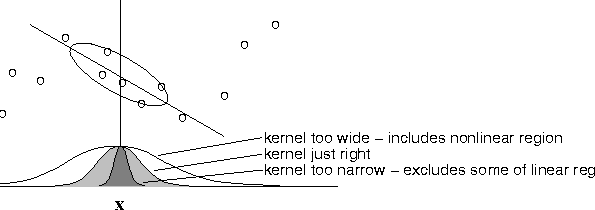

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style="color:red; background:orange; border:0.5px dashed white;" role="tab" aria-controls="Dataset"><center>Implementation</center></h3>

In [ ]:
def kernel(data, point, xmat, k):
    m,n = np.shape(xmat)
    ws = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - data[j]
        ws[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return ws
 
def local_weight(data, point, xmat, ymat, k):
    wei = kernel(data, point, xmat, k)
    return (data.T*(wei*data)).I*(data.T*(wei*ymat.T))
     
def local_weight_regression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*local_weight(xmat, xmat[i],xmat,ymat,k)
    return ypred

In [ ]:
ypred = local_weight_regression(data, mtip, 0.5)
indices = data[:,1].argsort(0)
xsort = data[indices][:,0]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(features, labels, color='green')
ax.plot(xsort[:,1],ypred[indices], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();